Objective:
- Univariate analysis relating individual attributes (e.g. difference in reach, difference in sig strikes landed) to match outcome
- Test if taking delta or ratio of attributes is more appropriate, and also if there is some other relationship captured by a different metric to take difference

Observations:
- In general, more advantageous values of attributes tend to correspond to higher incidence of winning. e.g. taller fighter wins more often, fighter who has landed more strikes per minute historically wins more often
- Delta seems to be more useful than ratio. See clearer differences in boxplots, while having less extreme values

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ufc import load_data

In [6]:
df = load_data.read_prepped_data()

In [51]:
compare_attributes = [
    'height',
    "age",
    'reach',
    'sig_strikes_landed_pm',
    'sig_strikes_accuracy',
    'sig_strikes_absorbed_pm',
    'sig_strikes_defended',
    'takedown_avg_per15m',
    'takedown_accuracy',
    'takedown_defence',
    'submission_avg_attempted_per15m'
]

Look at relationship between positive delta and likelihood of winning

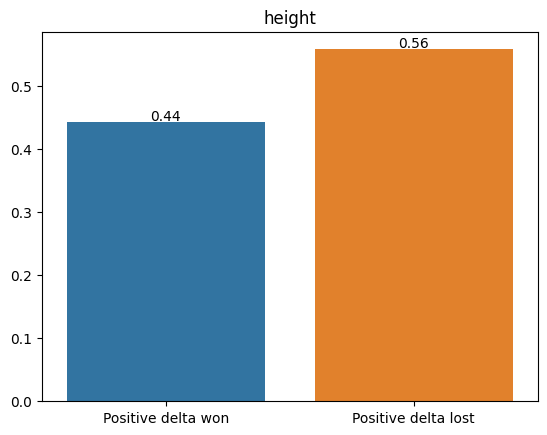

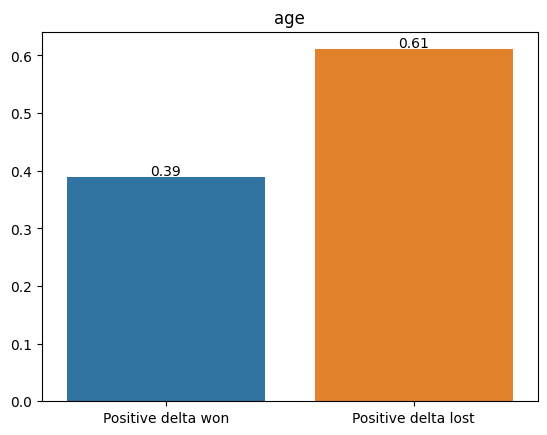

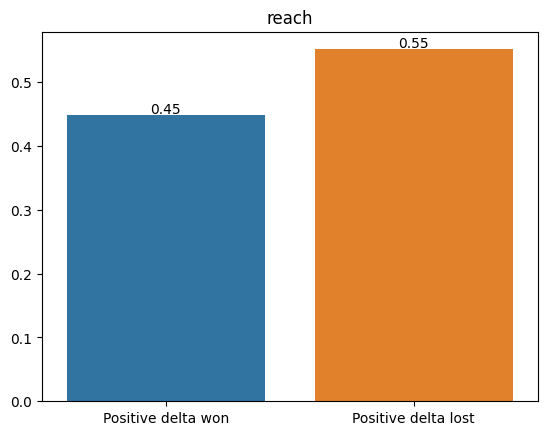

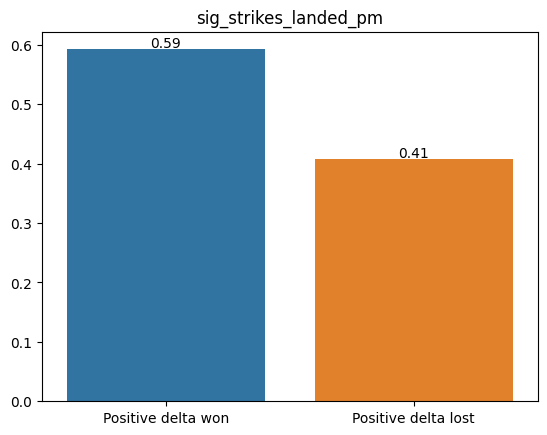

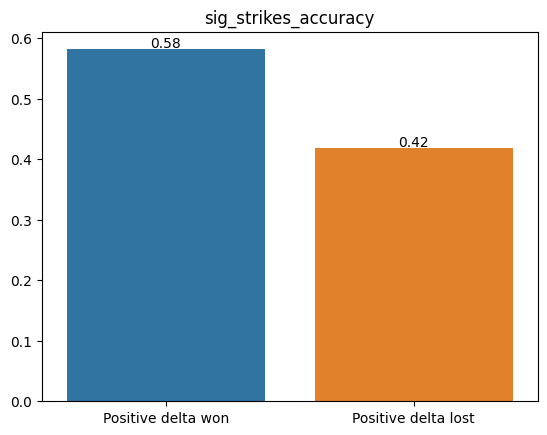

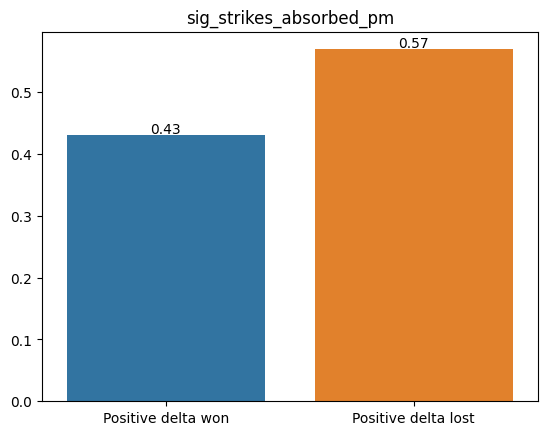

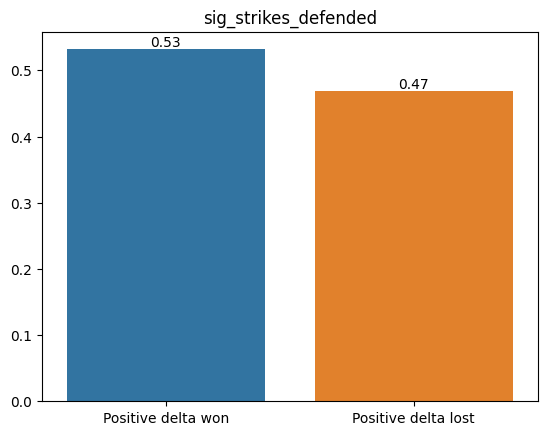

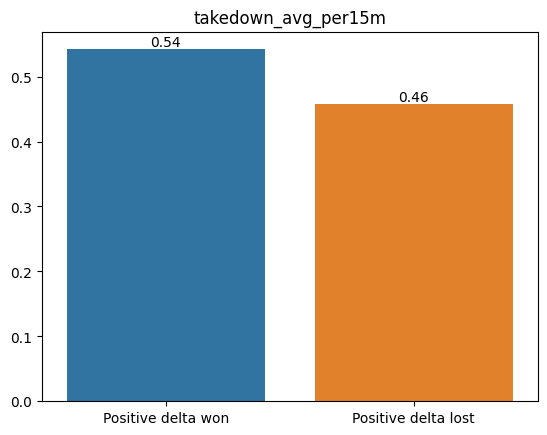

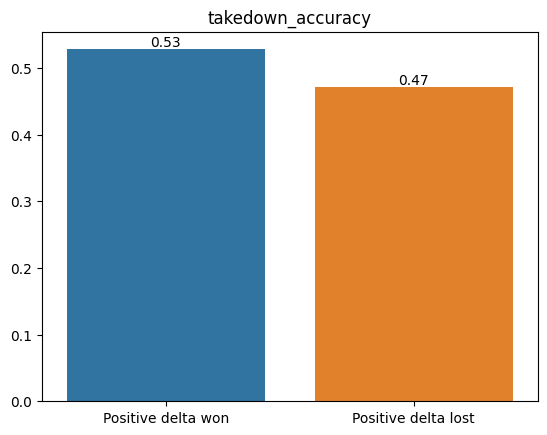

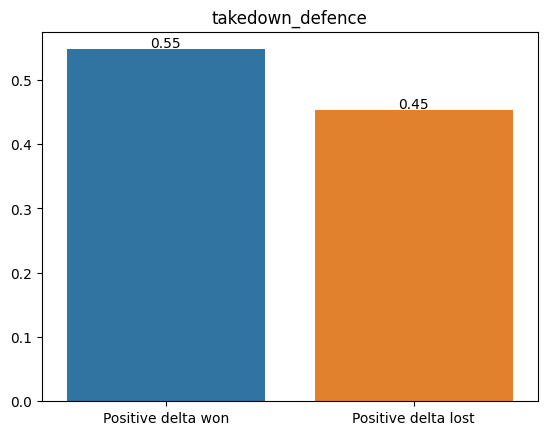

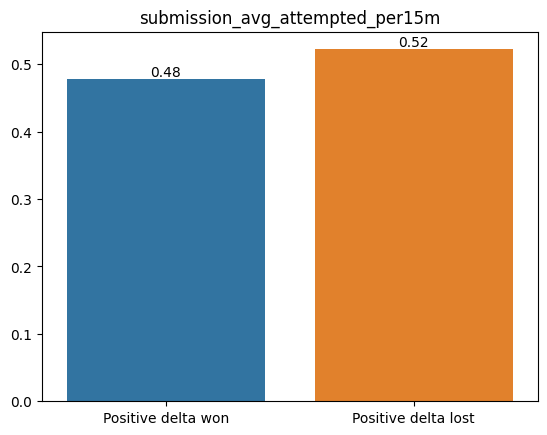

In [53]:
for attribute in compare_attributes:

    # Calculate how often positive delta (e.g. fighter with higher sig strikes landed pm) wins
    positive_delta_won = len(
                            df[
                                ((df.outcome == "fighter1") & (df[f"delta_{attribute}"] > 0)) |
                                ((df.outcome == "fighter2") & (df[f"delta_{attribute}"] < 0)) 
                            ]
                        ) / len(df)
    negative_delta_won = 1 - positive_delta_won

    # Collect to df
    results = pd.DataFrame({"Positive delta won": positive_delta_won, "Positive delta lost": negative_delta_won}, index=[0])

    # Plot
    ax = sns.barplot(data=results)
    ax.set(title=attribute)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()+0.01), ha='center', va='center', fontsize=10, color='black')

    plt.show()


1. Individual attributes (fighter1_* vs fighter2_* vs outcome)

In [ ]:
for attribute in compare_attributes:
    sns.scatterplot(
        data=df,
        x=f"fighter1_{attribute}",
        y=f"fighter2_{attribute}",
        hue="outcome",
    ).set(title=attribute)
    plt.show()

2. Delta of attributes vs match outcome

In [ ]:
for attribute in compare_attributes:
    sns.barplot(
        data=df,
        y="outcome",
        x=f"delta_{attribute}"
    ).set(title=attribute)
    plt.show()

3. Ratio of attributes vs match outcome

In [ ]:
for attribute in compare_attributes:
    sns.boxplot(
        data=df,
        y="outcome",
        x=f"ratio_{attribute}"
    ).set(title=attribute)
    plt.show()